Libraries

In [1]:
library(tidyverse)
library(quanteda)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Package version: 1.4.3
Parallel computing: 2 of 4 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: ‘quanteda’

The following object is masked from ‘jupyter:irkernel’:

    View

The following object is masked from ‘package:utils’:

    View



Load the Data

In [2]:
tweets <- read_csv("../Data/English_tweets_labelled.csv")

#not enough English tweets
tweets <- filter(tweets, leader != 'Yves-François Blanchet')

tweets <- filter(tweets, `ENVIRO & ENRGY` == 1)


── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_datetime(format = ""),
  leader = col_character(),
  language = col_character(),
  tweet = col_character(),
  `NTL & GLBL LDRSP` = col_double(),
  `AFRD & ECON_INSEC` = col_double(),
  INDG = col_double(),
  `PLR, HM & IMM` = col_double(),
  `ENVIRO & ENRGY` = col_double()
)



In [3]:
head(tweets)

date,leader,language,tweet,NTL & GLBL LDRSP,AFRD & ECON_INSEC,INDG,"PLR, HM & IMM",ENVIRO & ENRGY
2019-09-11 18:39:58,Andrew Scheer,en,"A new Conservative government will take immediate action to put more money in your pocket so you can get ahead. We’re going to make maternity benefits tax-free, cancel the Trudeau carbon tax, and take the GST off home heating costs. https://t.co/eOg1H72RUL",0,1,0,0,1
2019-09-13 01:00:08,Jagmeet Singh,en,"""I remember a mom who told me she was worried about the future - 'I'm worried if my daughter will be able to breathe the air.'"" Check out Jagmeet's commitment to keep our air, water, and land clean: https://t.co/wRPAT9ZVj1 #firstdebate #elxn43",0,0,0,0,1
2019-09-13 01:34:33,Jagmeet Singh,en,"""At a basic level, we ensure that there is equal funding. We also ensure that there is clean drinking water, that there is access to quality homes. And we make sure that Indigenous people are treated as equal partners in decisions."" #firstdebate #elxn43 https://t.co/L6WjHhbh6S",0,1,1,0,1
2019-09-13 14:13:52,Andrew Scheer,en,"Putting more money in your pocket. Today, I’m revealing our new Green Public Transit Credit to help you get ahead. WATCH LIVE: https://t.co/7ThC510xIa",0,1,0,0,1
2019-09-13 15:32:00,Andrew Scheer,en,"Today in Mississauga I revealed our Green Public Transit Tax Credit to put more money in the pocket of our transit users and commuters. We want you to be able to get home on time, without worrying about your bottom line. https://t.co/o8jFpuT1t2",0,1,0,0,1
2019-09-13 17:02:00,Andrew Scheer,en,"For so many, public transit is the only way to get from A to B, and it can cost a lot. As Prime Minister, I will introduce the Green Public Transit Tax Credit to provide much-needed relief for transit users, commuters, and families in Canada. https://t.co/gyUykL7Gzj",0,1,0,0,1


Clean the data

In [4]:
#Remove Punctuation and Symbols (still keeps hashtags)
tweets.tokens <- tokens(tweets$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

#send to lowercase
tweets.tokens <- tokens_tolower(tweets.tokens)

#remove stopwords
tweets.tokens <- tokens_select(tweets.tokens, stopwords(), selection = "remove")

#stem
tweets.tokens <- tokens_wordstem(tweets.tokens, language = "english")

#bag of words
tweets.tokens.dfm <- dfm(tweets.tokens, tolower=FALSE)

#tfidf
tweets.tokens.tfidf <- dfm_tfidf(tweets.tokens.dfm)

In [5]:
#more data cleaning...
tweets.tokens.df_tfidf <- cbind(Label = tweets$leader, Label = tweets$date, as.data.frame(tweets.tokens.tfidf))

tweets.tokens.tfidf.df <- cbind(data.frame(tweets.tokens.df_tfidf))

names(tweets.tokens.tfidf.df) <- make.names(names(tweets.tokens.tfidf.df))

tweets.tokens.tfidf.df <- tweets.tokens.tfidf.df[, !(names(tweets.tokens.tfidf.df) %in% c("document"))]

Warning message:
“'as.data.frame.dfm' is deprecated.
Use 'convert(x, to = "data.frame")' instead.
See help("Deprecated")”

PCA and Visualisation

In [6]:
numeric <- tweets.tokens.tfidf.df[, !(names(tweets.tokens.tfidf.df) %in% c("Label", "Label.1"))]

In [7]:
pca <- prcomp(numeric)

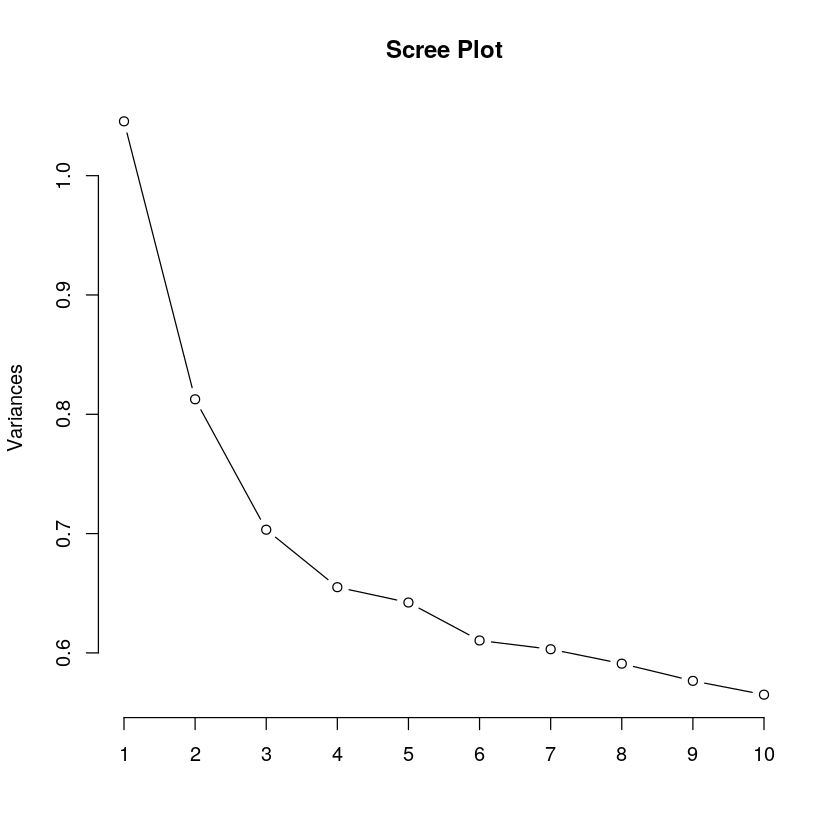

In [8]:
screeplot(pca, type='l', npcs=10, main="Scree Plot")

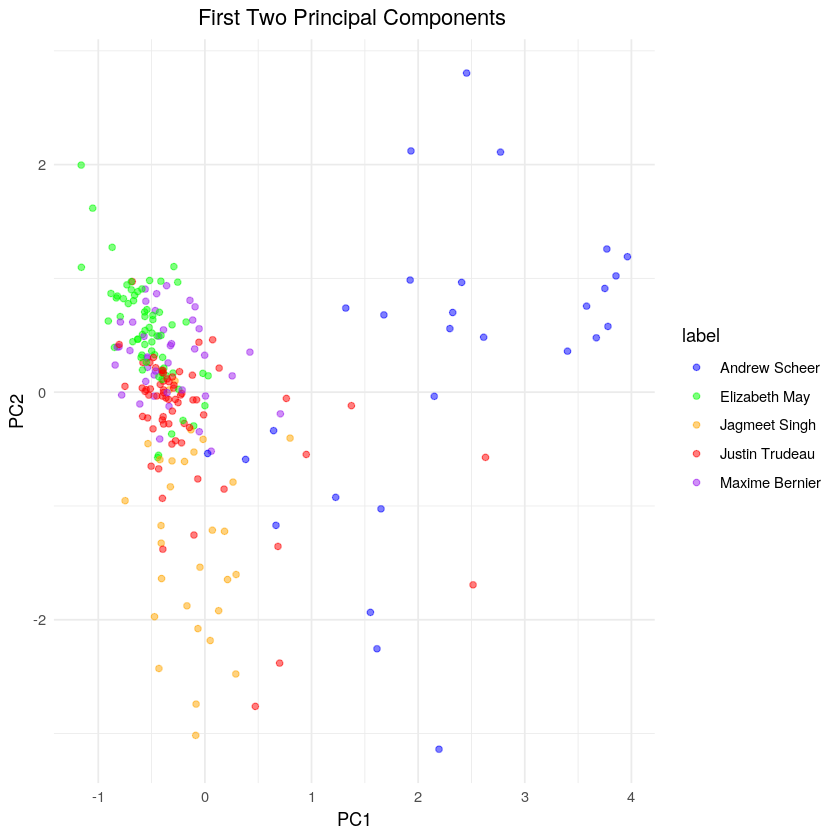

In [9]:
pca$x[,1:2] %>%
    as.data.frame() %>%
    mutate(label = factor(tweets.tokens.tfidf.df$Label)) %>%
    ggplot(aes(PC1, PC2, colour = label)) +
    geom_point(alpha = 0.5) +
    ggtitle("\t\t\tFirst Two Principal Components") +
    theme_minimal() +
    scale_color_manual(values=c("blue","green","orange","red","purple"))